# 1. Important Information

# 2. Loading The Data

Import all of the necessary libraries:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Load the data from the '.csv' file into a 'pandas dataframe'.

In [34]:
data = pd.read_csv('RICE.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation Year  19404 non-null  int64  
 1   Standard Week     19404 non-null  int64  
 2   Pest Value        19404 non-null  float64
 3   Collection Type   19404 non-null  object 
 4   MaxT              19404 non-null  float64
 5   MinT              19404 non-null  float64
 6   RH1(%)            19404 non-null  float64
 7   RH2(%)            19404 non-null  float64
 8   RF(mm)            19404 non-null  float64
 9   WS(kmph)          19404 non-null  float64
 10  SSH(hrs)          19404 non-null  float64
 11  EVP(mm)           19404 non-null  float64
 12  PEST NAME         19404 non-null  object 
 13  Location          19404 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB
None


,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack


# 3. Data Exploration

## 3.1 Attribute Analysis

### Understanding Each Feature

- **Observation Year**: The fiscal year that the observation / reading was made.
- **Standard Week**: The week of the year that the observation / reading was made (Ranging from 1 to 52).
- **Pest Value**: The numerical value of the reading that was taken. This is used to create the target attribute.
- **Collection Type**: The process / procedure used to take the reading.
- **MaxT**: The maximum temperature during the respective week.
- **MinT**: The minimum temperature during the respective week.
- **RH1(%)**: The maximum relative humidity during the respective week.
- **RH2(%)**: The minimum relative humidity during the respective week.
- **RF(mm)**: The rainfall (in mm) during the respective week.
- **WS(kmph)**: The wind speed (in kmph) during the respective week.
- **SSH(hrs)**: The average sunshine hours per day during the respective week.
- **EVP(mm)**: The evaporation (in mm) during the respective week.
- **Pest Name**: The recorded pest's name.
- **Location**: The location where the reading was collected / recorded.

### Coverage
- **Temporal Coverage Start Date**: 1960/12/31
- **Temporal Coverage End Date**: 2011/12/31
- **Geospatial Coverage**: India

In [35]:
data.describe()

,Observation Year,Standard Week,Pest Value,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm)
count,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000
mean,2000.024789,26.473717,807.944081,31.169006,20.404540,82.190981,53.725763,19.414152,4.501268,6.858529,5.877180
std,9.827306,15.016247,5290.180315,4.904610,5.388381,13.846883,18.948801,39.160009,3.194973,4.176542,6.536221
min,1959.000000,1.000000,0.000000,10.900000,0.800000,9.300000,6.700000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,13.000000,0.000000,28.800000,17.500000,79.100000,38.000000,0.000000,2.300000,4.900000,2.900000
50%,2001.000000,26.000000,3.000000,30.900000,22.000000,87.300000,56.600000,0.000000,3.700000,7.300000,4.000000
75%,2007.000000,39.000000,92.000000,33.425000,24.400000,91.000000,69.000000,21.400000,5.900000,8.900000,6.000000
max,2011.000000,52.000000,311169.000000,71.600000,30.900000,100.000000,95.100000,444.400000,27.600000,127.100000,68.300000


### "Collection Type"

This shows that there are 5 different 'Collection Types' used to collect the 'Pest Value'. There are no deviations or inconsistencies with the names, therefore no normalization is needed.

In [36]:
print(data['Collection Type'].describe())
print('')
print(data['Collection Type'].unique())
print('')
print(data['Collection Type'].value_counts())

count                 19404
unique                    5
top       Number/Light trap
freq                  16430
Name: Collection Type, dtype: object

['Number/hill' 'Number/Light trap' 'Percent Damage'
 'Number/Pheromone trap' 'Percentage']

Collection Type
Number/Light trap        16430
Percentage                2298
Number/Pheromone trap      520
Percent Damage             104
Number/hill                 52
Name: count, dtype: int64


### "Pest Name"

In [37]:
print(data['PEST NAME'].describe())
print('')
print(data['PEST NAME'].unique())
print('')
print(data['PEST NAME'].value_counts())

count               19404
unique                 11
top       Yellowstemborer
freq                 4333
Name: PEST NAME, dtype: object

['Brownplanthopper' 'Gallmidge' 'Greenleafhopper' 'LeafFolder'
 'Yellowstemborer' 'Caseworm' 'Miridbug' 'Whitebackedplanthopper'
 'ZigZagleafhopper' 'LeafBlast' 'NeckBlast']

PEST NAME
Yellowstemborer           4333
Gallmidge                 3016
Greenleafhopper           2287
LeafBlast                 2090
Brownplanthopper          1958
LeafFolder                1716
Whitebackedplanthopper    1248
Miridbug                  1144
Caseworm                   936
ZigZagleafhopper           468
NeckBlast                  208
Name: count, dtype: int64


### "Location"

In [38]:
print(data['Location'].describe())
print('')
print(data['Location'].unique())
print('')
print(data['Location'].value_counts())

count        19404
unique           6
top       Maruteru
freq          7053
Name: Location, dtype: object

['Cuttack' 'Ludhiana' 'Maruteru' 'Palampur' 'Raipur' 'Rajendranagar']

Location
Maruteru         7053
Rajendranagar    5539
Raipur           2132
Ludhiana         1976
Cuttack          1456
Palampur         1248
Name: count, dtype: int64


## 3.2 Pest Name Analysis

### "Brownplanthopper"

In [39]:
data_BrownPlanthopper = data[data['PEST NAME'] == 'Brownplanthopper']
print(data_BrownPlanthopper['Collection Type'].describe())
print('')
print(data_BrownPlanthopper['Collection Type'].unique())

count                  1958
unique                    2
top       Number/Light trap
freq                   1906
Name: Collection Type, dtype: object

['Number/hill' 'Number/Light trap']


### "Gallmidge"

In [40]:
data_Gallmidge = data[data['PEST NAME'] == 'Gallmidge']
print(data_Gallmidge['Collection Type'].describe())
print('')
print(data_Gallmidge['Collection Type'].unique())

count                  3016
unique                    2
top       Number/Light trap
freq                   2912
Name: Collection Type, dtype: object

['Number/Light trap' 'Percent Damage']


### "Greenleafhopper"

In [41]:
data_Greenleafhopper = data[data['PEST NAME'] == 'Greenleafhopper']
print(data_Greenleafhopper['Collection Type'].describe())
print('')
print(data_Greenleafhopper['Collection Type'].unique())

count                  2287
unique                    1
top       Number/Light trap
freq                   2287
Name: Collection Type, dtype: object

['Number/Light trap']


### "LeafFolder"

In [42]:
data_LeafFolder = data[data['PEST NAME'] == 'LeafFolder']
print(data_LeafFolder['Collection Type'].describe())
print('')
print(data_LeafFolder['Collection Type'].unique())

count                  1716
unique                    1
top       Number/Light trap
freq                   1716
Name: Collection Type, dtype: object

['Number/Light trap']


### "Yellowstemborer"

In [43]:
data_Yellowstemborer = data[data['PEST NAME'] == 'Yellowstemborer']
print(data_Yellowstemborer['Collection Type'].describe())
print('')
print(data_Yellowstemborer['Collection Type'].unique())

count                  4333
unique                    2
top       Number/Light trap
freq                   3813
Name: Collection Type, dtype: object

['Number/Light trap' 'Number/Pheromone trap']


### "Caseworm"

In [44]:
data_Caseworm = data[data['PEST NAME'] == 'Caseworm']
print(data_Caseworm['Collection Type'].describe())
print('')
print(data_Caseworm['Collection Type'].unique())

count                   936
unique                    1
top       Number/Light trap
freq                    936
Name: Collection Type, dtype: object

['Number/Light trap']


### "Miridbug"

In [45]:
data_Miridbug = data[data['PEST NAME'] == 'Miridbug']
print(data_Miridbug['Collection Type'].describe())
print('')
print(data_Miridbug['Collection Type'].unique())

count                  1144
unique                    1
top       Number/Light trap
freq                   1144
Name: Collection Type, dtype: object

['Number/Light trap']


### "Whitebackedplanthopper"

In [46]:
data_Whitebackedplanthopper = data[data['PEST NAME'] == 'Whitebackedplanthopper']
print(data_Whitebackedplanthopper['Collection Type'].describe())
print('')
print(data_Whitebackedplanthopper['Collection Type'].unique())

count                  1248
unique                    1
top       Number/Light trap
freq                   1248
Name: Collection Type, dtype: object

['Number/Light trap']


### "ZigZagleafhopper"

In [47]:
data_ZigZagleafhopper = data[data['PEST NAME'] == 'ZigZagleafhopper']
print(data_ZigZagleafhopper['Collection Type'].describe())
print('')
print(data_ZigZagleafhopper['Collection Type'].unique())

count                   468
unique                    1
top       Number/Light trap
freq                    468
Name: Collection Type, dtype: object

['Number/Light trap']


### "LeafBlast"

In [48]:
data_LeafBlast = data[data['PEST NAME'] == 'LeafBlast']
print(data_LeafBlast['Collection Type'].describe())
print('')
print(data_LeafBlast['Collection Type'].unique())

count           2090
unique             1
top       Percentage
freq            2090
Name: Collection Type, dtype: object

['Percentage']


### "NeckBlast"

In [49]:
data_NeckBlast = data[data['PEST NAME'] == 'NeckBlast']
print(data_NeckBlast['Collection Type'].describe())
print('')
print(data_NeckBlast['Collection Type'].unique())

count            208
unique             1
top       Percentage
freq             208
Name: Collection Type, dtype: object

['Percentage']


## 3.3 Data Visualization

### Attribute Frequency

#### Bar Charts

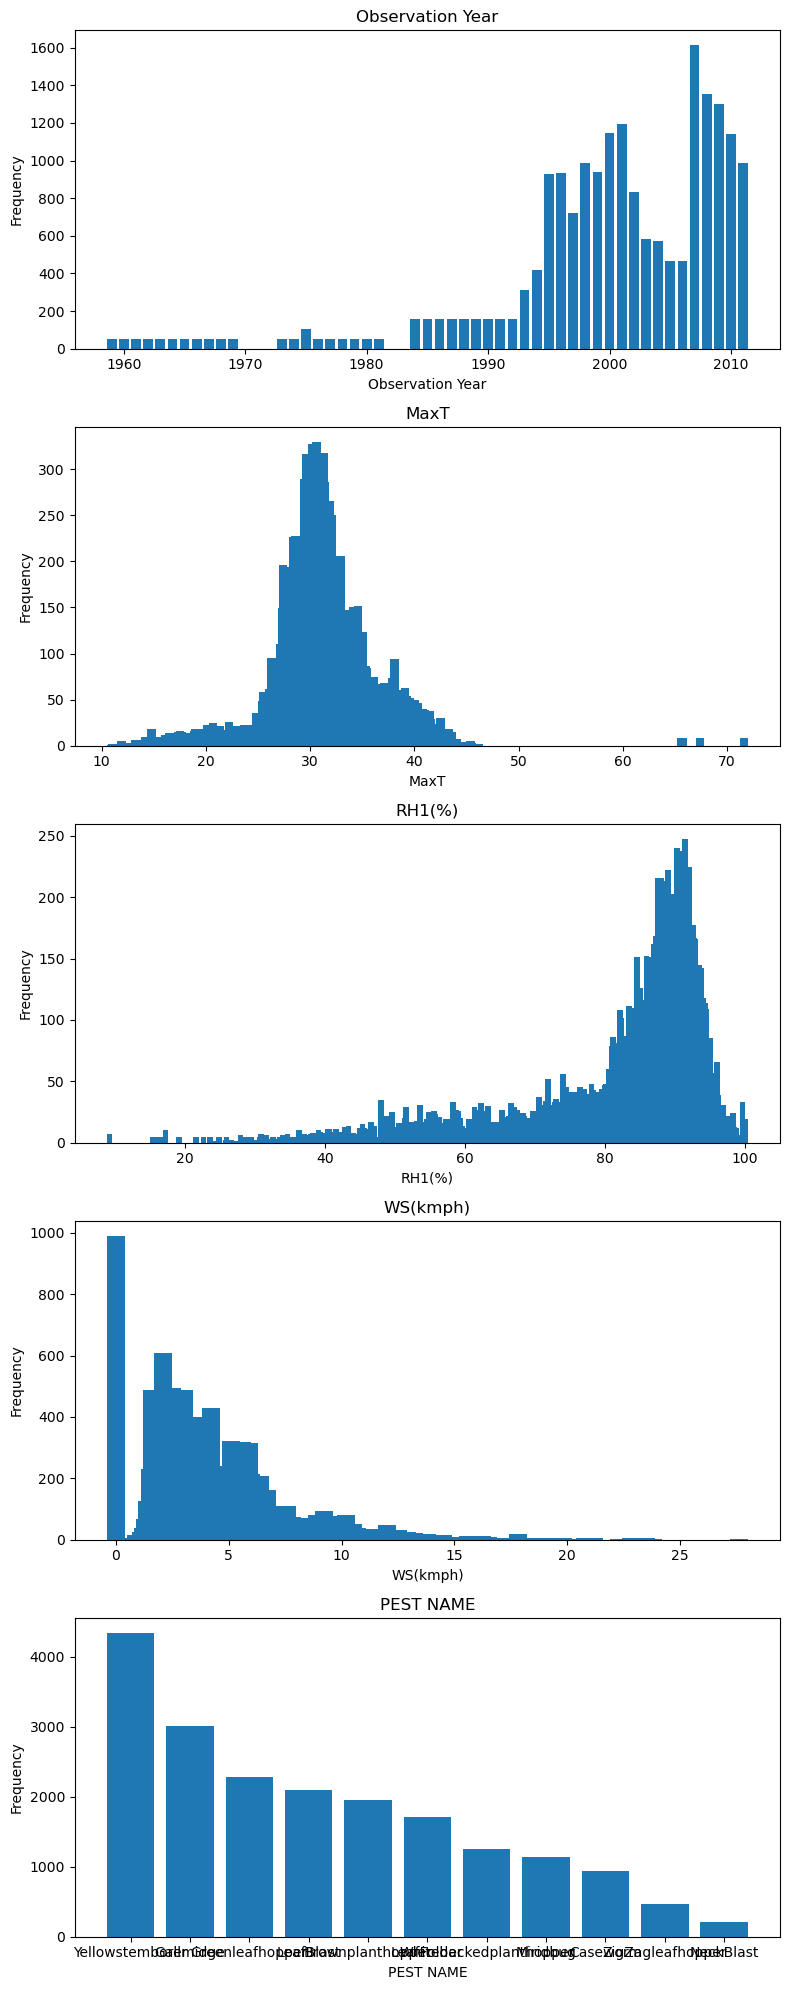

In [50]:
# Select the columns for bar plots
columns = ['Observation Year', 'MaxT', 'RH1(%)', 'WS(kmph)', 'PEST NAME']

# Create subplots for bar plots
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 4*len(columns)))

# Create bar plots for each column
for i, column in enumerate(columns):
    # Count the frequency of each unique value in the column
    value_counts = data[column].value_counts()
    
    # Plotting the bar graph
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Frequency")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

#### Pie Charts

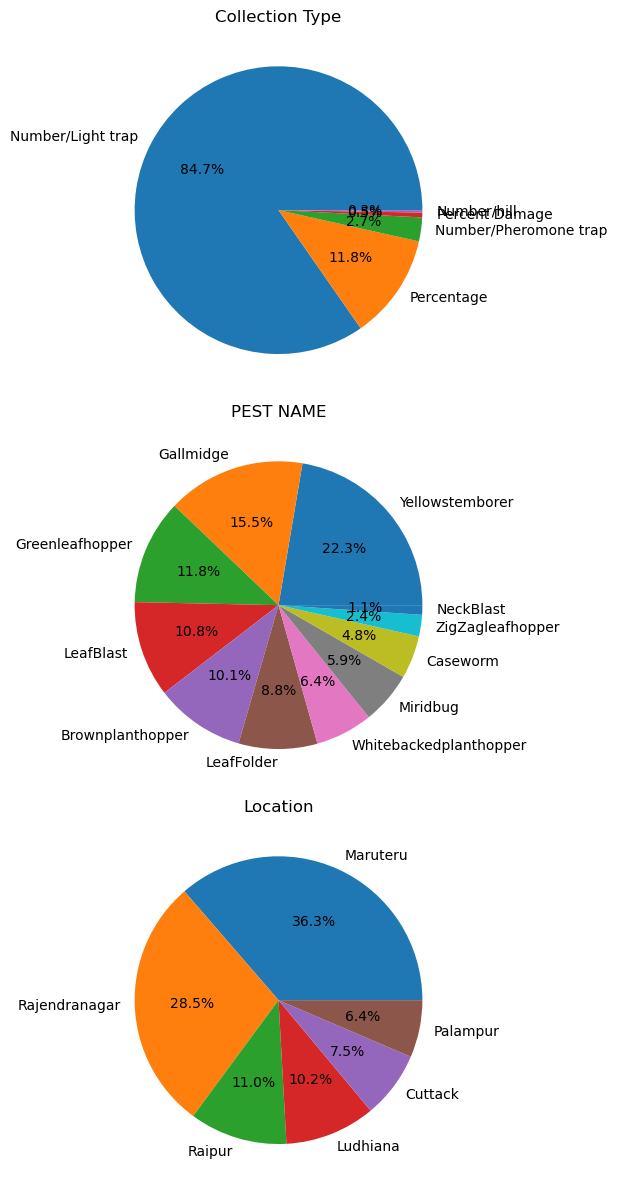

In [51]:
# Select the columns for pie charts
columns = ['Collection Type', 'PEST NAME', 'Location']

# Create subplots for pie charts (stacked vertically)
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 4*len(columns)))

# Ensure axs is iterable for single subplot case
if len(columns) == 1:
    axs = [axs]

# Create pie charts for each column
for i, column in enumerate(columns):
    # Count the frequency of each unique value in the column
    value_counts = data[column].value_counts()
    
    # Plotting the pie chart
    axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axs[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# 4. Data Preprocessing

## 4.1 Creating The Target Attribute
The "Outbreak" attribute is used as the target attribute for the Machine Learning Models for the "pest outbreak prediction", which is a typical Decision Support System (DSS). It is  created with the following logic:

"If the 'Pest Value' is anything above '0', it is seen as an outbreak."

In [52]:
data['Outbreak'] = (data['Pest Value'] > 0).astype(int)
data.head()

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location,Outbreak
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack,0
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack,0
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack,0
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack,0
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack,0


### Total Outbreak Percentage 

In [53]:
print(data['Outbreak'].value_counts())
print('')
count_ones = data['Outbreak'].sum()
total = data['Outbreak'].count()
pct = count_ones / total * 100
print(f"Outbreak == 1: {count_ones}/{total} ({pct:.2f}%)")

Outbreak
1    10734
0     8670
Name: count, dtype: int64

Outbreak == 1: 10734/19404 (55.32%)


This represents a balanced dataset. Allowing the model to be trained equally with records that contain an outbreak and records that don't.

### Removing The 'Pest Value' Attribute

The 'Pest Value' attribute was used to create the target attribute called 'Outbreak', therefore it is no longer needed. Now it will be removed from the dataset.

In [54]:
data.drop(columns=['Pest Value'], inplace=True)
data.head()

,Observation Year,Standard Week,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location,Outbreak
0,2003,1,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack,0
1,2003,2,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack,0
2,2003,3,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack,0
3,2003,4,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack,0
4,2003,5,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack,0


### Empty Values

This is to check if there are any empty values in the dataset. This shows that all of the columns and records are populated.

In [55]:
data.isnull().sum()

Observation Year    0
Standard Week       0
Collection Type     0
MaxT                0
MinT                0
RH1(%)              0
RH2(%)              0
RF(mm)              0
WS(kmph)            0
SSH(hrs)            0
EVP(mm)             0
PEST NAME           0
Location            0
Outbreak            0
dtype: int64

## 4.2 Duplicate Records

This is to check if there are any duplicate records found in the dataset. They are then removed. This dataset doesn't contain any duplicates.

In [56]:
print(data.duplicated().value_counts())
data = data.drop_duplicates()

False    19404
Name: count, dtype: int64


## 4.3 Handling Outliers

In [57]:
# Plot / Visualize the outliers of the numerical features
for col in data[['MaxT', 'MinT', 'RH1(%)', 'RH2(%)', 'RF(mm)', 'WS(kmph)', 'SSH(hrs)', 'EVP(mm)']]:
    fig = px.box(
        data_frame=data, 
        x=col,
        orientation='h',
        title=f'Boxplot of the Target ({col}) - With Outliers'
    )
    fig.show()

In [58]:
# Create a mask to filter out the outliers for 'LoanAmount'
# mask_MaxT = (data['MaxT'] >= 23.3) & (data['MaxT'] <= 38.7)

# # print(data[mask_MaxT].head())
# # print(data[mask_MaxT].info())

# fig = px.box(
#     data_frame=data[mask_MaxT], 
#     x='MaxT', 
#     orientation='h',
#     title='Boxplot of the Target (MaxT) - Without Outliers')

# fig.update_layout(xaxis_title='Target')
# fig.show()

## 4.4 Encode Categorical Variables

Use One-Hot encoding for 'PEST NAME', 'Location', and 'Collection Type'.

In [59]:
# 1. Define categorical and numeric columns
cat_cols = ['Collection Type', 'PEST NAME', 'Location']
num_cols = [c for c in data.columns if c not in cat_cols + ['Outbreak']]

# 2. One-hot encode categorical features
data = pd.get_dummies(data, columns=cat_cols, drop_first=False)

# 5. Modelling

## 5.1 Splitting The Data

The data needs to be split into the training set and the testing set. 80% of the dataset will be assigned to the training set and 20% will be assigned to the training set. The sets are assigned randomly to ensure integrity.

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Outbreak'], inplace=False)
y = data['Outbreak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5.2 Random Forest Model

A Random Forest Model is trained using the training set from above.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight=None  # or 'balanced' if you use a stricter Outbreak threshold
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest classification report:")
print(classification_report(y_test, y_pred))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob))

Random Forest classification report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1734
           1       0.85      0.91      0.88      2147

    accuracy                           0.87      3881
   macro avg       0.87      0.86      0.86      3881
weighted avg       0.87      0.87      0.86      3881

Random Forest ROC AUC: 0.9414335283964266


## 5.3 Gradient Boosting Model

A Gradient Boosting Model is trained using the training set from above.

In [62]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'  # suppresses warning
    # scale_pos_weight can be tuned if classes become imbalanced
)

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("XGBoost classification report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost classification report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1734
           1       0.86      0.92      0.89      2147

    accuracy                           0.87      3881
   macro avg       0.87      0.87      0.87      3881
weighted avg       0.87      0.87      0.87      3881

XGBoost ROC AUC: 0.9433640137333874


## 5.4 Making Predictions With The Models

This is to use the trained models on new raw records. When you want to predict for new raw rows (with original columns).

In [66]:
# 1. Example new raw records (same columns as original data before encoding)
df_new_raw = pd.DataFrame([
    {
        "Observation Year": 2010,
        "Standard Week": 30,
        "Pest Value": 50.0,                  # this will be dropped, same as when preparing training data
        "Collection Type": "Number/Light trap",
        "MaxT": 32.5,
        "MinT": 24.0,
        "RH1(%)": 90.0,
        "RH2(%)": 60.0,
        "RF(mm)": 25.0,
        "WS(kmph)": 4.0,
        "SSH(hrs)": 7.0,
        "EVP(mm)": 4.5,
        "PEST NAME": "Brownplanthopper",
        "Location": "Cuttack"
    },
    {
        "Observation Year": 2005,
        "Standard Week": 10,
        "Pest Value": 0.0,
        "Collection Type": "Number/Light trap",
        "MaxT": 28.0,
        "MinT": 18.0,
        "RH1(%)": 80.0,
        "RH2(%)": 45.0,
        "RF(mm)": 0.0,
        "WS(kmph)": 3.0,
        "SSH(hrs)": 8.5,
        "EVP(mm)": 3.0,
        "PEST NAME": "Yellowstemborer",
        "Location": "Maruteru"
    },
    {
        "Observation Year": 2008,
        "Standard Week": 38,
        "Pest Value": 200.0,
        "Collection Type": "Number/Light trap",
        "MaxT": 33.0,
        "MinT": 23.0,
        "RH1(%)": 92.0,
        "RH2(%)": 65.0,
        "RF(mm)": 40.0,
        "WS(kmph)": 6.0,
        "SSH(hrs)": 5.5,
        "EVP(mm)": 5.0,
        "PEST NAME": "LeafBlast",
        "Location": "Rajendranagar"
    }
])

# 2. Drop the "Pest Value" attribute
df_new_raw = df_new_raw.drop(columns=["Pest Value"])

# 3. Function from previous answer, adjusted to use global cat_cols
cat_cols = ['Collection Type', 'PEST NAME', 'Location']  # must match training
trained_feature_cols = X_train.columns                   # from the training step

def prepare_new_records(df_raw, trained_columns, cat_cols):
    # One-hot encode categorical as in training
    df_encoded = pd.get_dummies(df_raw, columns=cat_cols, drop_first=False)

    # Add missing dummy columns
    for col in trained_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Drop extra columns not used in training
    df_encoded = df_encoded[trained_columns]

    return df_encoded

# 4. Prepare new data
X_new = prepare_new_records(df_new_raw, trained_feature_cols, cat_cols)

# 5. Predict with trained models
# Random Forest predictions
rf_preds_new = rf_clf.predict(X_new)
rf_probs_new = rf_clf.predict_proba(X_new)[:, 1]

print("New raw records:")
print(df_new_raw)
print("\nRandom Forest predicted Outbreak (0/1):", rf_preds_new)
print("Random Forest predicted probability of Outbreak:", rf_probs_new)

print("\n")

# XGBoost predictions
xgb_preds_new = xgb_clf.predict(X_new)
xgb_probs_new = xgb_clf.predict_proba(X_new)[:, 1]

print("XGBoost predicted Outbreak (0/1):", xgb_preds_new)
print("XGBoost predicted probability of Outbreak:", xgb_probs_new)


New raw records:
   Observation Year  Standard Week    Collection Type  MaxT  MinT  RH1(%)  \
0              2010             30  Number/Light trap  32.5  24.0    90.0   
1              2005             10  Number/Light trap  28.0  18.0    80.0   
2              2008             38  Number/Light trap  33.0  23.0    92.0   

   RH2(%)  RF(mm)  WS(kmph)  SSH(hrs)  EVP(mm)         PEST NAME  \
0    60.0    25.0       4.0       7.0      4.5  Brownplanthopper   
1    45.0     0.0       3.0       8.5      3.0   Yellowstemborer   
2    65.0    40.0       6.0       5.5      5.0         LeafBlast   

        Location  
0        Cuttack  
1       Maruteru  
2  Rajendranagar  

Random Forest predicted Outbreak (0/1): [0 1 1]
Random Forest predicted probability of Outbreak: [0.48       0.91333333 0.79      ]


XGBoost predicted Outbreak (0/1): [0 1 1]
XGBoost predicted probability of Outbreak: [0.258903   0.96805286 0.91739213]


## 5.5 Long Short-Term Memory Model

The LSTM Model will be trained on one pest and one location. The following code focuses on Brownplanthopper in Cuttack.

In [ ]:
import numpy as np
import pandas as pd

# Start from your cleaned 'data' where Pest Value is dropped and Outbreak is defined
# data columns: Observation Year, Standard Week, Collection Type, MaxT, ..., PEST NAME, Location, Outbreak

# 1. Filter to one pest and one location (simplest case)
pest = "Brownplanthopper"
loc = "Cuttack"

df = data[(data["PEST NAME"] == pest) & (data["Location"] == loc)].copy()

# 2. Sort by time
df = df.sort_values(by=["Observation Year", "Standard Week"]).reset_index(drop=True)

# 3. (Optional) Drop columns you don't want as inputs
# For a first LSTM, you might use only numeric weather + week + year as inputs
input_cols = [
    "Observation Year",
    "Standard Week",
    "MaxT",
    "MinT",
    "RH1(%)",
    "RH2(%)",
    "RF(mm)",
    "WS(kmph)",
    "SSH(hrs)",
    "EVP(mm)",
]
target_col = "Outbreak"

df_model = df[input_cols + [target_col]].copy()
